In [1]:
#Import the packages
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/pima-indians-diabetes-2.csv")

In [3]:
df.shape

(768, 9)

In [5]:
df.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.dtypes

Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [8]:
df.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [9]:
df.sample(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
119,4,99,76,15,51,23.2,0.223,21,0
244,2,146,76,35,194,38.2,0.329,29,0
637,2,94,76,18,66,31.6,0.649,23,0
567,6,92,62,32,126,32.0,0.085,46,0
689,1,144,82,46,180,46.1,0.335,46,1
91,4,123,80,15,176,32.0,0.443,34,0
762,9,89,62,0,0,22.5,0.142,33,0
690,8,107,80,0,0,24.6,0.856,34,0
631,0,102,78,40,90,34.5,0.238,24,0
574,1,143,86,30,330,30.1,0.892,23,0


In [10]:
#lets build our linear model
#independent variables
X=df.drop(['class'],axis=1)
#the dependent variable
y=df[['class']]

In [11]:
 # Split X and y into training and test set in 70:30 ratio
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.30)

In [12]:
model_1=LogisticRegression()
model_1.fit(X_train,Y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
model_1.score(X_train,Y_train)

0.7560521415270018

In [14]:
model_1.score(X_test,Y_test)

0.8138528138528138

In [15]:
from sklearn import metrics

In [16]:
predictions=model_1.predict(X_test)

In [17]:
print(metrics.classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       153
           1       0.79      0.62      0.69        78

    accuracy                           0.81       231
   macro avg       0.81      0.77      0.78       231
weighted avg       0.81      0.81      0.81       231



In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,predictions)

array([[140,  13],
       [ 30,  48]], dtype=int64)

In [19]:
from sklearn.metrics import classification_report
classification_report(Y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.82      0.92      0.87       153\n           1       0.79      0.62      0.69        78\n\n    accuracy                           0.81       231\n   macro avg       0.81      0.77      0.78       231\nweighted avg       0.81      0.81      0.81       231\n'

In [20]:
cm=metrics.confusion_matrix(Y_test,predictions,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in["1","0"]],
                    columns=[i for i in ["Predict 1","Predict 0"]])


<AxesSubplot:>

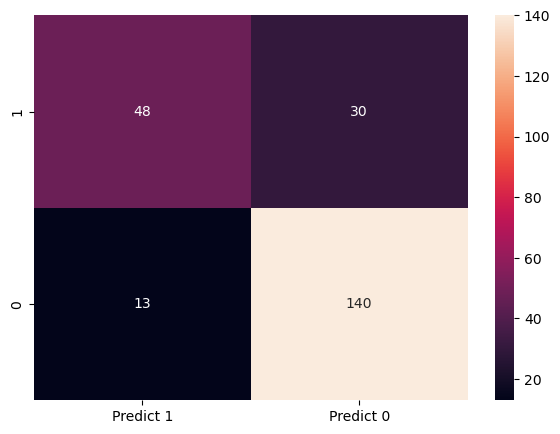

In [21]:
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [22]:
from sklearn.svm import SVC

In [56]:
model_2=SVC(kernel="linear",gamma="auto",C=100)

In [57]:
model_2.fit(X_train,Y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100, gamma='auto', kernel='linear')

In [58]:
model_2.score(X_train,Y_train)

0.750465549348231

In [51]:
model_2.score(X_test,Y_test)

0.8008658008658008

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
model_3=DecisionTreeClassifier(max_depth=4)

In [74]:
model_3.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=4)

In [75]:
model_3.score(X_train,Y_train)

0.7914338919925512

In [76]:
model_3.score(X_test,Y_test)

0.7748917748917749